# White House Environmental Justice Lab #3

In this lab, we'll be continuing our analyis of the White House Environmental Justice data.

Let's start by running the following cell to load the necessary packages and set some important settings.

In [1]:
# Run this cell to get started

# Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datascience as ds
from ipywidgets import *

# Setting plot and table configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()
pd.set_option('display.max_columns', None)

## The Data

As from previous labs, we will be using data from the White House Environmental Justice (Need source/link). This subset of the full data set focuses on California, providing data on health outcomes and environmental conditions.


Run the next cell to read the data in to a table.

In [109]:
# Run this cell to load the data
data_string = "data/California_WHEJ.csv"
df = pd.read_csv(data_string)
table = ds.Table.read_table(data_string)

Now that we have read the data into a table, let's take a look at the first couple of rows.

In [110]:
df.head()

,Unnamed: 0,GEOID10,Housing burden (percent),Total population,Median household income (% of state median household income),Current asthma among adults aged >=18 years,Coronary heart disease among adults aged >=18 years,Cancer (excluding skin cancer) among adults aged >=18 years,Current lack of health insurance among adults aged 18-64 years,Diagnosed diabetes among adults aged >=18 years,Physical health not good for >=14 days among adults aged >=18 years,Air toxics cancer risk,Respiratory hazard index,Diesel particulate matter,Particulate matter (PM2.5),Ozone,Traffic proximity and volume,Proximity to RMP sites,Proximity to TSDF sites,Proximity to NPL sites,Wastewater discharge,Percent pre-1960s housing (lead paint indicator),Individuals under 5 years old,Individuals over 64 years old,Linguistic isolation (percent),Percent of households in linguistic isolation,Poverty (Less than 200% of federal poverty line),Percent individuals age 25 or over with less than high school degree,Unemployed civilians (percent),Housing + Transportation Costs % Income for the Regional Typical Household,Score A,Score B,Socioeconomic Factors,Sensitive populations,Environmental effects,Exposures,Pollution Burden,Population Characteristics,Score C,Score D,Score E,"Low AMI, Low HS graduation",Meets socioeconomic criteria,Meets burden criteria,Score F (communities),OBJECTID,ID,STATE_NAME,ST_ABBREV,REGION,ACSTOTPOP,D_PM25_2,D_OZONE_2,D_DSLPM_2,D_CANCR_2,D_RESP_2,D_PTRAF_2,D_LDPNT_2,D_PNPL_2,D_PRMP_2,D_PTSDF_2,D_PWDIS_2,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS,VULEOPCT,VULSVI6PCT,MINORPCT,LOWINCPCT,LINGISOPCT,LESSHSPCT,UNDER5PCT,OVER64PCT,Shape_Length,Shape_Area,FIPS code,State Abr.,County name,CBSA title,CBSA 2012 pop,County 2012 pop,2013 code,2006 code,1990-based code
0,10297,60014001001,0.143300,2991,2.922323,7.9,5.1,8.5,4.8,8.0,9.0,26.496604,0.437041,0.597205,8.272783,29.312510,1128.001614,0.175204,2.292090,0.118582,0.000000e+00,0.176558,0.061852,0.254096,0.011601,0.036683,0.095909,0.017828,0.050000,76.0,0.115592,0.013343,0.485942,0.669558,0.480974,0.488320,0.485871,0.577750,0.280712,0.055911,0.297226,False,False,False,False,10298,60014001001,California,CA,9,2991,-3824.220643,-13550.156040,-276.067254,-12248.460670,-202.028692,-5.214360e+05,-81.616573,-54.816203,-80.990880,-1059.553708,0.000000,8.272783,29.312510,0.597205,26.496604,0.437041,1128.001614,0.176558,0.118582,0.175204,2.292090,0.000000e+00,0.201916,0.129048,0.307924,0.095909,0.036683,0.017828,0.061852,0.254096,18116.601500,1.108122e+07,6001,CA,Alameda County,"San Francisco-Oakland-Hayward, CA",4455560,1554720,1,1,1
1,10298,60014002001,0.068750,1102,3.156775,8.0,4.0,6.9,4.8,6.1,7.6,28.281955,0.477660,0.784154,8.309303,28.514542,5492.556095,0.236346,5.426261,0.152012,0.000000e+00,0.957014,0.081670,0.195100,0.000000,0.000000,0.078947,0.030941,0.036082,55.0,0.135196,0.016439,0.309663,0.576540,0.658200,0.564220,0.595547,0.443102,0.263888,0.039194,0.196257,False,False,True,False,10299,60014002001,California,CA,9,1102,-1552.411631,-5327.318832,-146.502048,-5283.865045,-89.240348,-1.026164e+06,-178.797067,-28.400038,-44.156077,-1013.778242,0.000000,8.309303,28.514542,0.784154,28.281955,0.477660,5492.556095,0.957014,0.152012,0.236346,5.426261,0.000000e+00,0.186933,0.113596,0.294918,0.078947,0.000000,0.030941,0.081670,0.195100,3775.322995,4.642223e+05,6001,CA,Alameda County,"San Francisco-Oakland-Hayward, CA",4455560,1554720,1,1,1
2,10299,60014002002,0.068750,895,2.161002,8.0,4.0,6.9,4.8,6.1,7.6,28.281955,0.477660,0.784154,8.309303,28.514542,10897.251150,0.239507,5.930150,0.161547,0.000000e+00,0.871921,0.004469,0.194413,0.000000,0.000000,0.163861,0.009211,0.024845,54.0,0.155107,0.017313,0.288754,0.349317,0.655383,0.567425,0.596744,0.319035,0.190383,0.049583,0.181428,False,False,True,False,10300,60014002002,California,CA,9,895,-1011.337458,-3470.546717,-95.440543,-3442.238218,-58.136711,-1.326320e+06,-106.122806,-19.662099,-29.150738,-721.767224,0.000000,8.309303,28.514542,0.784

Add something about what the data looks like/segue to next section

## Review

We'll provide an overview of the concepts we covered in lecture. If you feel confident about the material on correlation (r), regression and coefficient of determination (r-squared), feel free to skip ahead! It is important to have a solid understanding of these concepts -- they are at the heart of the later parts of this lab. Make sure to ask any questions you have to clarify these concepts so you can get the most out of this lab!

If you need some help or extra resources, try looking at the (insert resources)

### The Correlation Coefficient: $r$

$r$ is a number between -1 and 1 that tells you:

 1. **What the relationship between two variables looks like** and
 2. **How strong that relationship is.**

![Correlation Examples](img/correlation-examples.svg)


We defined functions that help us calculate the correlation coefficient in lecture. Don't worry about how it is defined -- simply run the cell below!

In [4]:
# Helps us define the correlation function
def standard_units(xyz): #
    return (xyz - np.mean(xyz))/np.std(xyz) 

# Finds the correlation between two columns of a table
def correlation(table, label_x, label_y):
    return np.mean(standard_units(table[label_x])*standard_units(table[label_y]))

We can now use our `correlation()` function to calculate the correlation coefficient between any two variables in a table. Let's look of at an example from the `df` data frame and use the `CANCER` and `PM25` columns to see the relationship between these two variables.
 * The `CANCER` variable denotes the air toxics cancer risk
 * The `PM25` variable denotes the level of PM 2.5 particles in the air. Particulate matter less than 2.5 micrometers poses the greates risk to health. Learn more about PM 2.5 [here](https://www.epa.gov/pm-pollution/particulate-matter-pm-basics#effects).

In [8]:
correlation(df,"CANCER", "PM25")

0.7024844007797718

We get a correlation coefficient (also known as $r$) of **0.7024** from our calculation. What does this value mean regarding the relationship between the level of PM 2.5 and the risk of cancer risk?
 * The value of the correlation coefficient is positive. This means that there is some sort of positive correlation between these variables: as the value of one variable increases, the other increases as well.
 * We can infer that places with a higher level of PM 2.5 tend to have a higher ris of cancer.
 * The value is close to 1, indicating that there is fairly **strong** correlation between the level of PM 2.5 and cancer risk.

### Your Turn:

Pick two variables from the `df` data frame and calculate the correlation using `correlation()`.

In [9]:
correlation(df, "PRE1960PCT", "VULEOPCT")

0.18210731955553025

**Interpret this value**

*Your answer here.*

## Prediction Using Simple Linear Regression

Linear regression is really just a term for **making predictions using lines**. With two variables, linear regression is just a plain old line:

$$Y = mX + b$$


<center><img src = img/simple_linear_regression.jpg>/</center>



In the example above:
 * Y is what you are predicting (e.g. University GPA) and
 * X is what you are basing the prediction off of (e.g. High School GPA)

So, all we need to make this line are two values:
 * the slope (m) of the line and
 * the intercept (b) of the line!

If you recall from your algebra classes:
* the **y-intercept** is just what the Y-value is expected to be when X = 0 (where the line crosses the y-axis), and
* the **slope** tells you how much the Y-value changes when the X-value changes.

In other words, the **slope** is highly dependent on the **relationship** between X and Y -- it is dependent on **the correlation coefficient**.

That's right: **we need the correlation coefficient in order to find the equation for the regression line**.

You don't need to know how any of the following functions are defined: we've given you everything you need to calculate the slope and intercept of the regression line -- all you need to do is to **run the cell below**, and we will show you how to use the functions.

In [47]:
# Converts data from normal units into standard units
def standard_units(xyz):
    return (xyz - np.nanmean(xyz))/np.nanstd(xyz) 
 # Added nanmean in line above
# Calculates the correlation using standard units
def correlation(table, label_x, label_y):
    return np.nanmean(standard_units(table.column(label_x))*standard_units(table.column(label_y)))
 # Added nanmean in line above
# We use these function to construct the regression line. As you can see, correlation is used to 
# evaluate the slope of the regression line below.

def slope(table, label_x, label_y):
    r = correlation(table, label_x, label_y) # correlation function used in slope!
    return r*np.nanstd(table.column(label_y))/np.nanstd(table.column(label_x))

def intercept(table, label_x, label_y):
    return np.nanmean(table.column(label_y)) - slope(table, label_x, label_y)*np.nanmean(table.column(label_x))
 # Added nanmean in line above

Suppose we want to find the equation of the regression line for the variables in the previous section - PM 2.5 & Cancer risk.

In [51]:
slope_of_reg_line = slope(table, "PM25", "CANCER")
slope_of_reg_line

2.4328098150697066

In [52]:
intercept_of_reg_line = intercept(table, "PM25", "CANCER")
intercept_of_reg_line

11.83907874127912

**Question**: Now we have the slope (m) and the intercept (b) of the the regression line. Given the values we just calculated above, what is the equation of the regression line?

*Your answer here.*

Now that we have the regression line, we can **plot it over our scatter plot** to visualize the prediction line on top of the actual data. The code cell below takes our slope and intercept, creates the function above (don't worry about how it is implemented). We can use this function to draw the regression line on top of our scatter plot!

In [53]:
# Defining the equation of the regression line
y = lambda x: slope_of_reg_line * x + intercept_of_reg_line

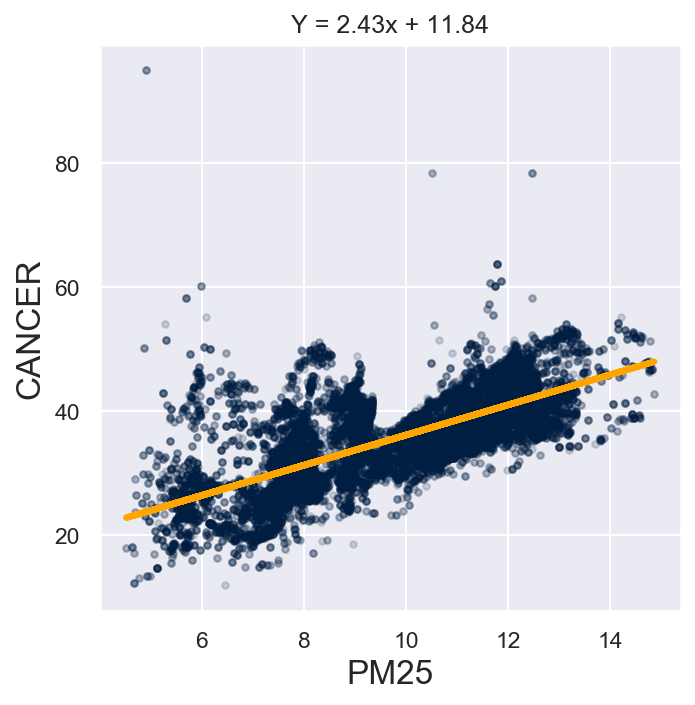

In [64]:
# Plotting the scatter plot
table.scatter("PM25", "CANCER", alpha = .16, s = 10) 

# Adding in the regression line
plt.plot(table.column('PM25'), y(table.column('PM25')), c = 'orange', lw = 3) 
# Adding a title
plt.title("Y = " + str(np.round(slope_of_reg_line,decimals=2)) + "x + " \
          + str(np.round(intercept_of_reg_line,decimals=2)));

The gold line above is the equation of the line you derived: $Y = 0.2.43*X + 11.84$. Amazingly, this simple line created by the equation in yellow is the best linear predictor of the data: out of all the infinitely many possible combinations of slopes and intercepts, the one we get from our functions predicts our data the best. If you know that an area has a PM 2.5 level of 12, what risk of cancer would you expect to see in that area? What about if the PM 2.5 level is 6? 

Conveniently, the .scatter() function has a setting that allows us to draw the regression line within the scatterplot (without doing any calculations!): all we do is to specify fit_line = True. Run the cell below and compare it to the plot above.

In [111]:
df.dropna(inplace=True)

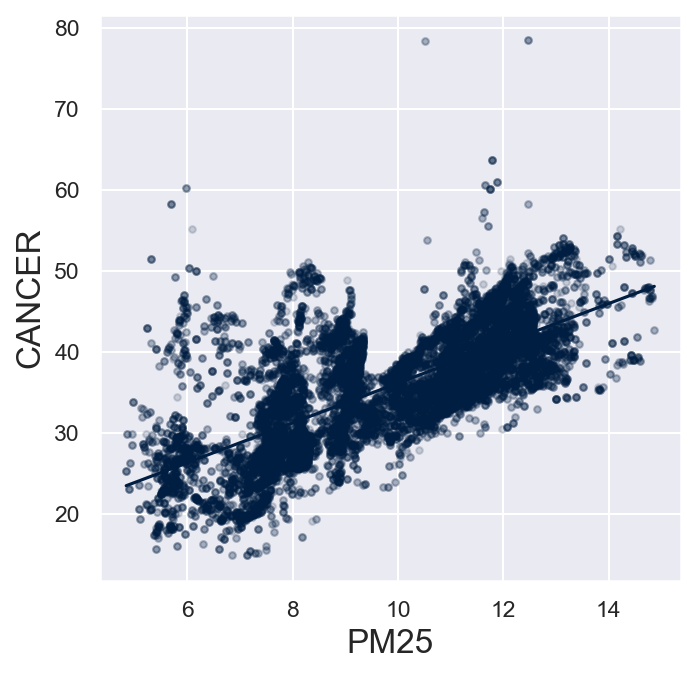

In [116]:
table2=ds.Table.from_df(df)
table2.scatter("PM25", "CANCER", fit_line=True, alpha = .16, s = 10)

## Coefficients fo Determination (R-Squared)

### How Good is our Predictive Model?

We know the following:
 * How to assess the relationship between two variables (correlation coefficient)
 * How to find the linear regression equation and use it to make **predictions**

But what if we want to assess how **effective** our linear regression model is? In other words, how do we evaluate how "good" our prediction is?

That is where the **Coefficient of Determination**, also called **r-squared**, comes in. It helps us assess the effectiveness of our predictive model and, more importantly, allows us to **compare** the effectiveness amongst various predictive models.

Here is all you need to know about **r-squared**:
* It's a number ranging from **0 to 1** that tells you how well the model predicts the outcome: 1 is a perfect prediction (if you know the X-value, you definitely know the Y-Value) while 0 is a terrible prediction (you might as well randomly guess!)

Side Note: It's called **r-squared** because in simple linear regression, the **Coefficient of Determination** is just the **square of the Correlation Coefficient r**. However, when we get to Multiple Regression (where we use TWO X variables to predict a Y variable for a total of 3 variables), we can't just rely on the relationship between **two** variables to evaluate the effectiveness of the model because the model can use **three** (or more!) variables. So, using r-squared allows us to compare model performance between any type of regression model!

For this lab, you are only responsible for **interpreting** the r-squared value.

In [7]:
def show_top_20_most_correlated_features(column_name):
    return df.corr()[column_name].sort_values(ascending=False).head(20)

In [8]:
show_top_20_most_correlated_features("CANCER")

Air toxics cancer risk                                            1.000000
CANCER                                                            1.000000
Exposures                                                         0.869608
Respiratory hazard index                                          0.843492
RESP                                                              0.843492
Pollution Burden                                                  0.808751
Particulate matter (PM2.5)                                        0.702478
PM25                                                              0.702478
Score C                                                           0.701383
Ozone                                                             0.489262
OZONE                                                             0.489262
Diesel particulate matter                                         0.483045
DSLPM                                                             0.483045
Meets burden criteria    

In [52]:
list_of_cols = df.columns.to_list()

In [55]:
interact(show_top_20_most_correlated_features, column_name=list_of_cols)

Unnamed: 0                                          1.000000
OBJECTID                                            1.000000
ID                                                  0.976443
GEOID10                                             0.976443
FIPS code                                           0.975705
County 2012 pop                                     0.427758
Particulate matter (PM2.5)                          0.307331
PM25                                                0.307331
Pollution Burden                                    0.306319
Exposures                                           0.290874
Score C                                             0.273093
CANCER                                              0.245061
Air toxics cancer risk                              0.245061
Environmental effects                               0.239799
Meets burden criteria                               0.233533
PRE1960PCT                                          0.230503
Percent pre-1960s housin

<function __main__.show_top_20_most_correlated_features(column_name)>

In [30]:
df.corr().abs()["PM25"].sort_values(ascending=False).head(20)

PM25                          1.000000
Particulate matter (PM2.5)    1.000000
Exposures                     0.876162
Pollution Burden              0.841204
Score C                       0.753842
Air toxics cancer risk        0.702478
CANCER                        0.702478
Ozone                         0.555567
OZONE                         0.555567
County 2012 pop               0.538524
Respiratory hazard index      0.536086
RESP                          0.536086
Diesel particulate matter     0.530642
DSLPM                         0.530642
Meets burden criteria         0.516309
Environmental effects         0.476890
MINORPCT                      0.426171
D_PM25_2                      0.390953
D_DSLPM_2                     0.390325
Score F (communities)         0.384537
Name: PM25, dtype: float64

In [ ]:
code_to_classification = pd.DataFrame({'2013 code': [1,2,3,4,5,6], 'Classification': ["Large Metro", "Medium Metro", "Medium Metro", "Non-Metro", "Non-Metro", "Non-Metro"]})